In [9]:
import os

os.getcwd()

os.chdir('/hpcnfs/techunits/imaging/work/ATTEND/achiodin/image_registration/current')

In [10]:
import matplotlib.pyplot as plt

from skimage.io import imread
from utils.visualization import plot_images_row 
from utils.make_paths import match_pattern_str_list
from utils.make_paths import make_paths_from_matches 
# from utils.registration import affine_registration
from utils.registration import affine_registration_cv2
# from utils.registration import diffeomorphic_registration
from utils.visualization import create_stereo_image
from utils.load_registration_images import load_registration_images

In [18]:
fixed_image_idx = 0
moving_image_idx = 1
crop_size = 2048
shape = (crop_size, crop_size, 3)

In [19]:
# imgs_dir_test = '/hpcnfs/techunits/imaging/work/ATTEND/crops_Zhan_images_DAPI'
imgs_dir_test = '/hpcnfs/techunits/imaging/work/ATTEND/crops_MaxIP_images_DAPI'


# imgs_files = os.listdir(imgs_dir_test)
# 
# crop_size_str = str(crop_size)
# 
# matches = match_pattern_str_list(crop_size_str, imgs_files)
# target_paths = make_paths_from_matches(imgs_dir_test, matches)
#  
# reference_image = imread(target_paths[fixed_image_idx])
# moving_image = imread(target_paths[moving_image_idx])

reference_image, moving_image = load_registration_images(imgs_dir_test, fixed_image_idx, moving_image_idx, crop_size)

In [13]:
img_dir_ground_truth = '/hpcnfs/techunits/imaging/work/ATTEND/crop_Zhan_registered'

# imgs_files = os.listdir(img_dir_ground_truth)
# crop_size_str = str(crop_size)
# 
# imgs_files = os.listdir(img_dir_ground_truth)
# 
# crop_size_str = str(crop_size)
# 
# matches = match_pattern_str_list(crop_size_str, imgs_files)
# target_paths = make_paths_from_matches(img_dir_ground_truth, matches)
#  
# reference_image_gt = imread(target_paths[fixed_image_idx])

reference_image_gt = load_registration_images(img_dir_ground_truth, fixed_image_idx, moving_image_idx, crop_size)

<tifffile.TiffFile 'Registered_2048px.ome.tiff'> OME series cannot handle discontiguous storage ((1999, 2034) != (2048, 2048))


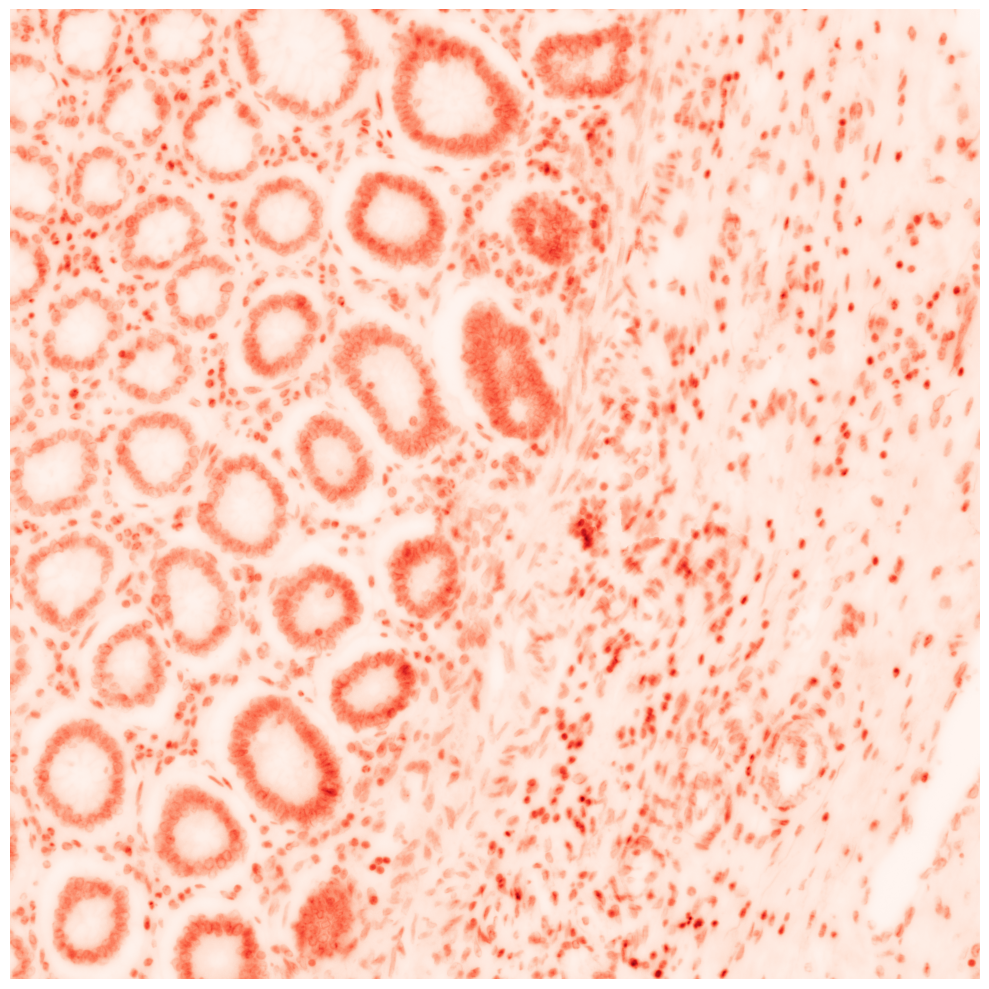

In [21]:
plot_images_row([reference_image], ncols=1, cmap='Reds', figsize=(10, 10))

## Affine registration

In [22]:
registered_image = affine_registration_cv2(reference_image, moving_image)

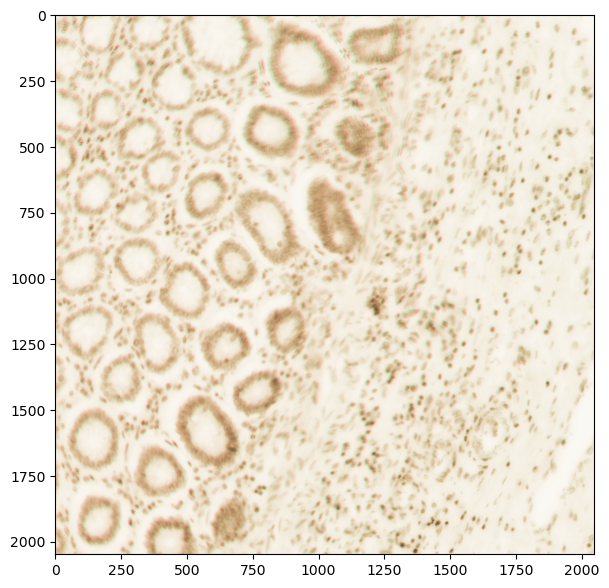

In [23]:
fig, ax=plt.subplots(1,1,figsize=(7,7))

ax.imshow(moving_image, cmap='Reds', alpha=0.8)
ax.imshow(reference_image, cmap='Greens', alpha=0.45)

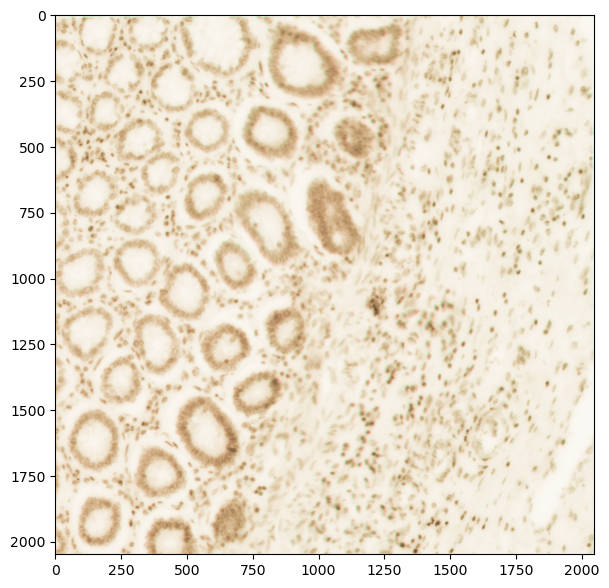

In [24]:
fig, ax=plt.subplots(1,1,figsize=(7,7))

ax.imshow(registered_image, cmap='Reds', alpha=0.8)
ax.imshow(reference_image, cmap='Greens', alpha=0.45)

## Diffeomorphic Registration

In [21]:
# registered_image = diffeomorphic_registration(reference_image, moving_image)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


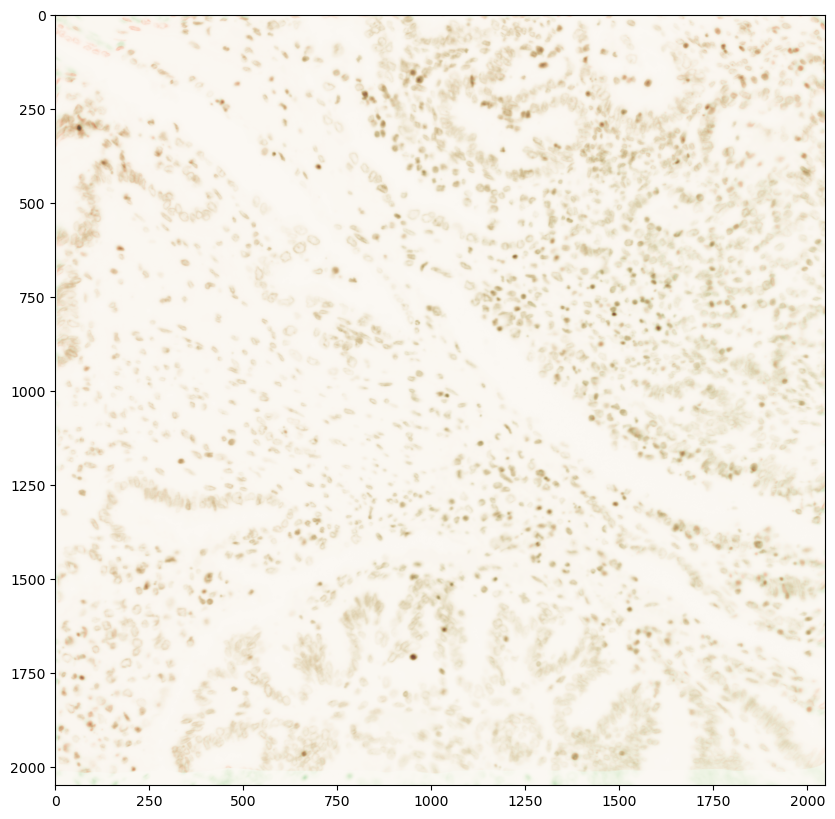

In [24]:
fig, ax=plt.subplots(1,1,figsize=(12,12))

ax.imshow(registered_image, cmap='Reds', alpha=0.8)
ax.imshow(reference_image, cmap='Greens', alpha=0.4)